# Données

## Chargement du dataframe global

In [1]:
import pandas as pd

df = pd.read_parquet("./data/df_final.parquet")
print("✅ Dataset rechargé avec succès.")

✅ Dataset rechargé avec succès.


In [2]:
df.shape

(2988181, 65)

In [3]:
df.head()

,user_id,session_id,session_start,session_size,click_article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,...,31,32,33,34,35,36,37,38,39,40
0,0,1506825423271737,1506825423000,2,157541,1506826828020,4,3,20,1,...,-0.321484,0.910162,-0.413011,0.680835,-0.418409,-0.526443,0.305625,-0.307805,-0.606366,-0.650556
1,0,1506825423271737,1506825423000,2,68866,1506826858020,4,3,20,1,...,-1.001013,0.797471,-0.492230,-0.305857,-1.307835,0.354010,0.696917,-0.486316,0.017210,-1.563045
2,1,1506825426267738,1506825426000,2,235840,1506827017951,4,1,17,1,...,-0.269690,0.873445,0.194144,0.056367,-0.431036,-0.020383,-0.376942,0.814494,0.709722,-1.030146
3,1,1506825426267738,1506825426000,2,96663,1506827047951,4,1,17,1,...,0.144034,-2.457183,-1.500929,-1.807169,-0.208940,-0.671638,-0.407914,2.561696,-1.379031,-1.877568
4,2,1506825435299739,1506825435000,2,119592,1506827090575,4,1,17,1,...,-1.163678,-0.230112,-2.132536,-0.729996,0.581913,-0.559910,-0.354824,-0.914158,-0.064399,-0.354175


In [4]:
df.columns

Index(['user_id', 'session_id', 'session_start', 'session_size',
       'click_article_id', 'click_timestamp', 'click_environment',
       'click_deviceGroup', 'click_os', 'click_country', 'click_region',
       'click_referrer_type', 'user_status_x', 'click_datetime',
       'session_start_datetime', 'user_status_y', 'article_id', 'category_id',
       'created_at_ts', 'publisher_id', 'words_count', 'publish_time_dt',
       'nb_clics', 'popularite_tag', '0', '1', '2', '3', '4', '5', '6', '7',
       '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31',
       '32', '33', '34', '35', '36', '37', '38', '39', '40'],
      dtype='object')

## Table pré-agrégée utilisateur-clics

In [5]:
user_clicks_df = (
    df.groupby('user_id')['click_article_id']
    .apply(lambda x: list(x.unique()))
    .reset_index()
    .rename(columns={'click_article_id': 'clicked_article_ids'})
)

user_clicks_df.head()
# sauvegarde en parquet ou json (mieux pour utilisation dans une app)
# user_clicks_df.set_index('user_id').to_json("./data/user_clicks.json", orient='index')

,user_id,clicked_article_ids
0,0,"[157541, 68866, 96755, 313996, 160158, 233470,..."
1,1,"[235840, 96663, 59758, 160474, 285719, 156723,..."
2,2,"[119592, 30970, 30760, 209122]"
3,3,"[236065, 236294, 234686, 233769, 235665, 23513..."
4,4,"[48915, 44488, 195887, 195084, 63307, 336499, ..."


## Liste des articles

In [91]:
df_articles = pd.read_csv("./data/articles_metadata.csv", encoding='utf-8')
df_articles

,article_id,category_id,created_at_ts,publisher_id,words_count
0,0,0,1513144419000,0,168
1,1,1,1405341936000,0,189
2,2,1,1408667706000,0,250
3,3,1,1408468313000,0,230
4,4,1,1407071171000,0,162
...,...,...,...,...,...
364042,364042,460,1434034118000,0,144
364043,364043,460,1434148472000,0,463
364044,364044,460,1457974279000,0,177
364045,364045,460,1515964737000,0,126


## Chargement des embeddings réduits

In [6]:
import pandas as pd

embeddings_df = pd.read_parquet('./data/articles_embeddings_pca.parquet')
print(embeddings_df.shape)

(364047, 41)


In [7]:
embeddings_df.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
article_id,,,,,,,,,,,,,,,,,,,,,
0,-1.854453,-5.592402,1.708724,-3.835164,1.415795,0.252210,0.426074,0.545480,-0.807394,1.520171,...,0.387738,-0.088799,0.990514,1.060148,-0.218378,-1.099852,-1.175524,1.370632,-0.264816,0.010117
1,-5.361997,4.122991,-2.357516,-3.428017,-0.431079,3.722260,2.389835,-1.267244,1.944162,2.980629,...,0.025565,-0.721510,0.649929,-0.405225,-0.090690,-3.094968,0.075186,0.245235,-1.250343,0.294538
2,-3.600085,-0.132112,-6.027451,0.985617,0.211965,4.591712,-1.815688,-2.170389,-2.783090,2.804910,...,0.565647,-1.862223,-0.336458,0.072410,0.241466,-0.877634,0.154883,1.133963,0.946740,-1.811314
3,-1.158963,7.293352,-5.916713,-1.370524,2.172241,-1.682487,1.070822,-2.160001,1.947324,4.069597,...,0.074049,-0.612824,-1.511408,1.071736,1.991838,-2.076190,-1.690459,-1.122692,0.714619,-1.576244
4,-1.142884,2.569328,-2.891860,-0.273997,2.913007,5.608970,0.308953,0.310888,-1.054171,2.158180,...,-1.527867,-0.155615,-0.163345,0.037253,1.173636,-4.232923,-1.287476,1.053438,-0.486085,-0.144550


💥 Si on veut une matrice de similarité complète sa taille (364 047 x 364 047) = 132 teraelements, soit ~494 Go de RAM en float32 🤯 <br>
On est dans une optique MVP avec un déploiement serverless, donc les modèles, fonctions, tables utilisées seront:<br>
📦 Compact : on passe d’un DataFrame d’interactions énorme à une simple table d'utilisateurs.<br>
🚀 Rapide à charger en mémoire (idéal pour des microservices).<br>
🔁 Facile à sérialiser (JSON, pickle, feather, parquet, etc.)<br>
💬 Compatible avec une API GET /recommendations?user_id=123

In [8]:
# conversion des embeddings en tableau NumPy (évite de calculer la matrice de similarité complète)
import numpy as np
article_ids = embeddings_df.index.to_numpy()
article_embeddings = embeddings_df.to_numpy()

# dictionnaire article_id -> vecteur
embedding_dict = dict(zip(article_ids, article_embeddings))

# 🧪 Exploration de différentes approches de recommandation

In [9]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

On va commencer par une fonction de recommandation la plus simple, un vecteur moyen à partir des clics effectués par l'utilisateur. C'est une approche naïve de type content-based, où l'on calcule la moyenne des embeddings des articles précédemment cliqués par un utilisateur pour prédire son prochain clic.

## Fonction de prédiction topN à partir de l'embedding moyen pour un utilisateur

### Prédiction du dernier clic à partir du profil sur l'embedding moyen

In [10]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def predict_topN_articles(user_id, df, embedding_dict, article_ids, article_embeddings, top_n=5):
    """
    Recommande les top-N articles les plus similaires à l'historique d’un utilisateur.

    Retourne :
    - Liste top-N : (article_id, similarité)
    - Dernier article cliqué (target) pour évaluation
    """
    # 1. Récupérer les clics utilisateur
    user_clicks = df[df["user_id"] == user_id].sort_values("click_timestamp")
    clicked_article_ids = user_clicks["click_article_id"].tolist()

    if len(clicked_article_ids) < 2:
        return None, None

    # 2. Séparer les clics passés et la cible
    target_article_id = clicked_article_ids[-1]
    past_article_ids = clicked_article_ids[:-1]

    # 3. Créer le profil utilisateur
    past_vectors = [embedding_dict[aid] for aid in past_article_ids if aid in embedding_dict]
    if not past_vectors:
        return None, target_article_id

    mean_embedding = np.mean(past_vectors, axis=0).reshape(1, -1)

    # 4. Calculer les similarités
    similarities = cosine_similarity(mean_embedding, article_embeddings)[0]

    # 5. Exclure uniquement les articles précédemment cliqués (pas le target)
    clicked_set = set(past_article_ids)
    candidate_indices = [i for i, aid in enumerate(article_ids) if aid not in clicked_set]

    if not candidate_indices:
        return None, target_article_id

    # 6. Retourner les top-N
    top_indices = sorted(candidate_indices, key=lambda i: similarities[i], reverse=True)[:top_n]
    top_n_result = [(article_ids[i], similarities[i]) for i in top_indices]

    return top_n_result, target_article_id


In [11]:
predict_topN_articles(user_id=42, df=df, embedding_dict=embedding_dict,
                      article_ids=article_ids, article_embeddings=article_embeddings, top_n=10)


([(278156, 0.7373911),
  (284712, 0.7225366),
  (331770, 0.7225303),
  (279669, 0.7215333),
  (345493, 0.72060627),
  (285310, 0.72059524),
  (345486, 0.720016),
  (278210, 0.71875995),
  (285500, 0.71721554),
  (281826, 0.71547675)],
 315146)

### Prédiction d'un clic aléatoire à partir du profil sur l'embedding moyen

In [79]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def predict_random_target(user_id, df, embedding_dict, article_ids, article_embeddings, top_n=5, seed=None):
    """
    Même logique que predict_topN_articles, mais avec un clic aléatoire de la session comme cible à prédire.
    """
    if seed is not None:
        np.random.seed(seed)

    user_clicks = df[df["user_id"] == user_id].sort_values("click_timestamp")
    clicked_article_ids = user_clicks["click_article_id"].tolist()

    if len(clicked_article_ids) < 2:
        return None, None

    target_index = np.random.choice(len(clicked_article_ids))
    target_article_id = clicked_article_ids[target_index]
    past_article_ids = clicked_article_ids[:target_index] + clicked_article_ids[target_index+1:]

    # Embeddings du profil
    past_vectors = [embedding_dict[aid] for aid in past_article_ids if aid in embedding_dict]
    if not past_vectors or target_article_id not in embedding_dict:
        return None, target_article_id

    mean_embedding = np.mean(past_vectors, axis=0).reshape(1, -1)
    similarities = cosine_similarity(mean_embedding, article_embeddings)[0]

    # Exclure les articles déjà vus (hors target)
    clicked_set = set(past_article_ids)
    candidate_indices = [i for i, aid in enumerate(article_ids) if aid not in clicked_set]

    top_indices = sorted(candidate_indices, key=lambda i: similarities[i], reverse=True)[:top_n]
    top_preds = [(article_ids[i], similarities[i]) for i in top_indices]

    return top_preds, target_article_id


In [80]:
predict_random_target(user_id=42, df=df, embedding_dict=embedding_dict,
                      article_ids=article_ids, article_embeddings=article_embeddings, top_n=10)


([(278156, 0.7434285),
  (345493, 0.7386373),
  (279669, 0.73616827),
  (286298, 0.7258414),
  (331770, 0.72441125),
  (278210, 0.72035897),
  (282193, 0.71892273),
  (345487, 0.71830785),
  (284712, 0.7179093),
  (345486, 0.7173384)],
 313996)

## Fonction de prédiction du top-N pondérée par récence et fraicheur des articles

### Prédiction du dernier clic à partir du profil embedding moyen pondéré par récence et fraicheur des articles

In [12]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def predict_topN_weighted_by_recency(
    user_id,
    df,
    embedding_dict,
    article_ids,
    article_embeddings,
    alpha=0.9,
    beta=1.0,
    top_n=5
):
    """
    Recommande les top-N articles en pondérant :
    - l'historique utilisateur par la récence des clics (alpha)
    - la recommandation finale par la récence de publication des articles (beta)

    Retour :
    - Liste top-N : (article_id, score_final)
    - article_id du dernier clic
    """
    user_clicks = df[df["user_id"] == user_id].sort_values("click_timestamp")
    clicked_article_ids = user_clicks["click_article_id"].tolist()

    if len(clicked_article_ids) < 2:
        return None, None

    target_article_id = clicked_article_ids[-1]
    past_ids = clicked_article_ids[:-1]

    past_vectors = [embedding_dict[aid] for aid in past_ids if aid in embedding_dict]
    if not past_vectors:
        return None, target_article_id

    embeddings = np.stack(past_vectors)

    # Poids décroissants selon la récence des clics
    weights = np.array([alpha ** i for i in reversed(range(len(embeddings)))])
    weights = weights / weights.sum()

    user_profile = np.average(embeddings, axis=0, weights=weights).reshape(1, -1)

    # Similarités cosinus
    similarities = cosine_similarity(user_profile, article_embeddings)[0]

    # Exclure uniquement les clics passés (pas le target)
    clicked_set = set(past_ids)
    candidate_indices = [i for i, aid in enumerate(article_ids) if aid not in clicked_set]

    if not candidate_indices:
        return None, target_article_id

    # Récupérer les timestamps de publication pour les candidats
    article_to_timestamp = df.drop_duplicates("article_id").set_index("article_id")["created_at_ts"].to_dict()
    candidate_ids = [article_ids[i] for i in candidate_indices]
    candidate_timestamps = np.array([article_to_timestamp.get(aid, 0) for aid in candidate_ids])

    # Calcul du score de fraîcheur (min-max scaling entre 0 et 1)
    if len(candidate_timestamps) > 1:
        min_ts = candidate_timestamps.min()
        max_ts = candidate_timestamps.max()
        recency_scores = (candidate_timestamps - min_ts) / (max_ts - min_ts + 1e-8)
    else:
        recency_scores = np.ones(len(candidate_timestamps))

    # Score combiné : similarité * fraîcheur^beta
    sim_scores = similarities[candidate_indices]
    final_scores = sim_scores * (recency_scores ** beta)

    # Top-N
    top_idx = np.argsort(final_scores)[::-1][:top_n]
    top_articles = [(candidate_ids[i], final_scores[i]) for i in top_idx]

    return top_articles, target_article_id


In [13]:
predict_topN_weighted_by_recency(user_id=42, df=df, embedding_dict=embedding_dict,
                      article_ids=article_ids, article_embeddings=article_embeddings, top_n=10)


([(288881, 0.7382520902508241),
  (285527, 0.6992101239359438),
  (292978, 0.6889818142694193),
  (331242, 0.6868859490279082),
  (331564, 0.6820750177178082),
  (288735, 0.6767643229870829),
  (285310, 0.6716642259725388),
  (293202, 0.6691473406392486),
  (293266, 0.6616665735747503),
  (348111, 0.6546409627722904)],
 315146)

### Prédiction d'un clic aléatoire à partir du profil embedding moyen pondéré par récence et fraicheur des articles

In [81]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def predict_random_target_weighted(user_id, df, embedding_dict, article_ids, article_embeddings, top_n=5, alpha=0.9, beta=1.0, seed=None):
    """
    Variante pondérée de predict_random_target :
    - clic cible tiré au hasard dans la session
    - pondération des clics par récence (alpha)
    - pondération des candidats par fraîcheur (beta)
    """
    if seed is not None:
        np.random.seed(seed)

    user_clicks = df[df["user_id"] == user_id].sort_values("click_timestamp")
    clicked_article_ids = user_clicks["click_article_id"].tolist()

    if len(clicked_article_ids) < 2:
        return None, None

    target_index = np.random.choice(len(clicked_article_ids))
    target_article_id = clicked_article_ids[target_index]
    past_article_ids = clicked_article_ids[:target_index] + clicked_article_ids[target_index+1:]

    past_vectors = [embedding_dict[aid] for aid in past_article_ids if aid in embedding_dict]
    if not past_vectors or target_article_id not in embedding_dict:
        return None, target_article_id

    embeddings = np.stack(past_vectors)
    weights = np.array([alpha ** i for i in reversed(range(len(embeddings)))])
    weights = weights / weights.sum()

    user_profile = np.average(embeddings, axis=0, weights=weights).reshape(1, -1)
    similarities = cosine_similarity(user_profile, article_embeddings)[0]

    clicked_set = set(past_article_ids)
    candidate_indices = [i for i, aid in enumerate(article_ids) if aid not in clicked_set]
    if not candidate_indices:
        return None, target_article_id

    article_to_timestamp = df.drop_duplicates("article_id").set_index("article_id")["created_at_ts"].to_dict()
    candidate_ids = [article_ids[i] for i in candidate_indices]
    candidate_timestamps = np.array([article_to_timestamp.get(aid, 0) for aid in candidate_ids])

    if len(candidate_timestamps) > 1:
        min_ts = candidate_timestamps.min()
        max_ts = candidate_timestamps.max()
        recency_scores = (candidate_timestamps - min_ts) / (max_ts - min_ts + 1e-8)
    else:
        recency_scores = np.ones(len(candidate_timestamps))

    sim_scores = similarities[candidate_indices]
    final_scores = sim_scores * (recency_scores ** beta)

    top_idx = np.argsort(final_scores)[::-1][:top_n]
    top_articles = [(candidate_ids[i], final_scores[i]) for i in top_idx]

    return top_articles, target_article_id


In [82]:
predict_random_target_weighted(user_id=42, df=df, embedding_dict=embedding_dict,
                      article_ids=article_ids, article_embeddings=article_embeddings, top_n=10)


([(288881, 0.759827586176912),
  (288735, 0.7255499238154909),
  (348111, 0.7188777992555067),
  (288942, 0.7163553141041552),
  (292978, 0.7121605888176916),
  (331564, 0.7096491945242199),
  (331863, 0.700467484381169),
  (293082, 0.6953721176566865),
  (288665, 0.6930796007223806),
  (292225, 0.6918867507066556)],
 75825)

## Approche par aggrégation de similarités (somme des similarités article-article entre les clics précédents et chaque candidat)

In [14]:
# def predict_top5_from_raw_sum_similarities(user_id, df, embeddings_df):
#     """
#     Prédit les articles les plus similaires aux articles cliqués par l'utilisateur
#     en agrégeant les similarités cosinus (somme) entre chaque clic passé et tous les articles.

#     Cette version est identique à celle du modèle ContentBasedRecommender, mais sous forme de fonction.
#     """
#     # Récupération des articles cliqués par l'utilisateur
#     clicked_article_ids = df[df['user_id'] == user_id]['article_id'].tolist()

#     if len(clicked_article_ids) < 2:
#         return None, None

#     past_article_ids = clicked_article_ids[:-1]  # on exclut le dernier clic à prédire
#     target_article_id = clicked_article_ids[-1]

#     # Embeddings des articles cliqués
#     clicked_embeddings = embeddings_df.loc[past_article_ids].values  # shape (n_clicks, dim)

#     # Embeddings de tous les articles
#     all_article_ids = embeddings_df.index
#     all_embeddings = embeddings_df.values  # shape (n_articles, dim)

#     # Similarités cosinus entre chaque clic et chaque article
#     similarities = cosine_similarity(clicked_embeddings, all_embeddings)  # shape (n_clicks, n_articles)

#     # Agrégation par somme
#     summed_similarities = np.sum(similarities, axis=0)  # shape (n_articles,)

#     # Construction du DataFrame
#     sim_df = pd.DataFrame({
#         "article_id": all_article_ids,
#         "similarity": summed_similarities
#     })

#     # Exclusion des articles déjà cliqués
#     sim_df = sim_df[~sim_df["article_id"].isin(clicked_article_ids)]
#     top5 = sim_df.sort_values(by="similarity", ascending=False).head(5).reset_index(drop=True)

#     return top5, target_article_id


# ✨ Visualisation à partir d'exemples

## Préparation des données utilisateur

In [15]:
def prepare_user_data(user_clicks_df, embedding_dict, user_id=None, min_clicks=2, debug=False):
    """
    Version optimisée avec table pré-agrégée : sélectionne un utilisateur et calcule son embedding moyen.

    Paramètres :
    - user_clicks_df : DataFrame avec 'user_id' et 'clicked_article_ids' (liste d’IDs)
    - embedding_dict : dict {article_id: embedding vector}
    - user_id : (optionnel) ID à forcer
    - min_clicks : nombre minimum de clics requis
    - debug : bool, infos affichées si True

    Retour :
    - selected_user : ID utilisateur sélectionné
    - clicked_article_ids : liste complète des articles
    - past_article_ids : tous sauf le dernier
    - target_article_id : dernier clic (à prédire)
    - mean_embedding : embedding moyen des articles précédents
    """
    # Compte des clics par utilisateur
    user_click_counts = user_clicks_df['clicked_article_ids'].apply(len)

    if user_id is None:
        mean_clicks = user_click_counts.mean()
        lower_bound = int(mean_clicks * 0.8)
        upper_bound = int(mean_clicks * 1.2)

        eligible_users = user_clicks_df[user_click_counts.between(lower_bound, upper_bound)]

        selected_user = None
        clicked_article_ids = []

        while selected_user is None or len(clicked_article_ids) < min_clicks:
            row = eligible_users.sample(1).iloc[0]
            selected_user = row['user_id']
            clicked_article_ids = row['clicked_article_ids']
    else:
        row = user_clicks_df[user_clicks_df['user_id'] == user_id]
        if row.empty:
            raise ValueError(f"Utilisateur {user_id} introuvable.")
        clicked_article_ids = row.iloc[0]['clicked_article_ids']
        selected_user = user_id
        if len(clicked_article_ids) < min_clicks:
            raise ValueError(f"L'utilisateur {selected_user} n'a que {len(clicked_article_ids)} clic(s).")

    # Séparation des clics passés et cible
    target_article_id = clicked_article_ids[-1]
    past_article_ids = clicked_article_ids[:-1]

    # Extraction des embeddings disponibles
    past_vectors = [embedding_dict[aid] for aid in past_article_ids if aid in embedding_dict]

    if not past_vectors:
        raise ValueError(f"Aucun embedding trouvé pour les clics de l’utilisateur {selected_user}.")

    mean_embedding = np.mean(past_vectors, axis=0).reshape(1, -1)

    if debug:
        print(f"Utilisateur sélectionné : {selected_user}")
        print(f"Nombre total de clics : {len(clicked_article_ids)}")
        print(f"Article cible : {target_article_id}")
        print(f"Articles précédents : {past_article_ids}")

    return selected_user, clicked_article_ids, past_article_ids, target_article_id, mean_embedding


In [16]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def visualize_user_recommendations(user_id, user_clicks_df, embedding_dict, article_ids, article_embeddings, df, top_n=5):
    # Étape 1 : Données utilisateur
    _, clicked_article_ids, past_article_ids, target_article_id, mean_embedding = prepare_user_data(
        user_clicks_df, embedding_dict, user_id=user_id, debug=True
    )

    # Étape 2 : Recommandations
    recommendations, _ = predict_topN_articles(
        user_id=user_id,
        df=df,
        embedding_dict=embedding_dict,
        article_ids=article_ids,
        article_embeddings=article_embeddings,
        top_n=top_n
    )

    recommended_ids = [aid for aid, _ in recommendations]

    # Étape 3 : Vecteurs à projeter
    vectors = []
    labels = []

    # Articles cliqués précédents
    for aid in past_article_ids:
        if aid in embedding_dict:
            vectors.append(embedding_dict[aid])
            labels.append("Past Click")

    # Article cible
    if target_article_id in embedding_dict:
        vectors.append(embedding_dict[target_article_id])
        labels.append("Target")

    # Articles recommandés
    for aid in recommended_ids:
        if aid in embedding_dict:
            vectors.append(embedding_dict[aid])
            labels.append("Recommendation")

    # t-SNE projection (correction : conversion en np.array)
    X = np.array(vectors)
    tsne = TSNE(n_components=2, random_state=42, perplexity=min(5, len(X) - 1))  # éviter l'erreur perplexity >= n_samples
    proj = tsne.fit_transform(X)

    # Étape 4 : Visualisation
    color_map = {"Past Click": "blue", "Target": "red", "Recommendation": "green"}

    plt.figure(figsize=(8, 6))
    for label in set(labels):
        idx = [i for i, l in enumerate(labels) if l == label]
        plt.scatter(proj[idx, 0], proj[idx, 1], label=label, color=color_map[label], alpha=0.7, s=60)

    plt.title(f"Projection t-SNE pour l'utilisateur {user_id}")
    plt.legend()
    plt.grid(True)
    plt.show()


Utilisateur sélectionné : 42
Nombre total de clics : 31
Article cible : 315146
Articles précédents : [145166, 284346, 157861, 75825, 107216, 313996, 285331, 336380, 129434, 225019, 208518, 119193, 226595, 71608, 336221, 226648, 352902, 288457, 336220, 353673, 235854, 284178, 292749, 285414, 119534, 9126, 331116, 158541, 292594, 218028]


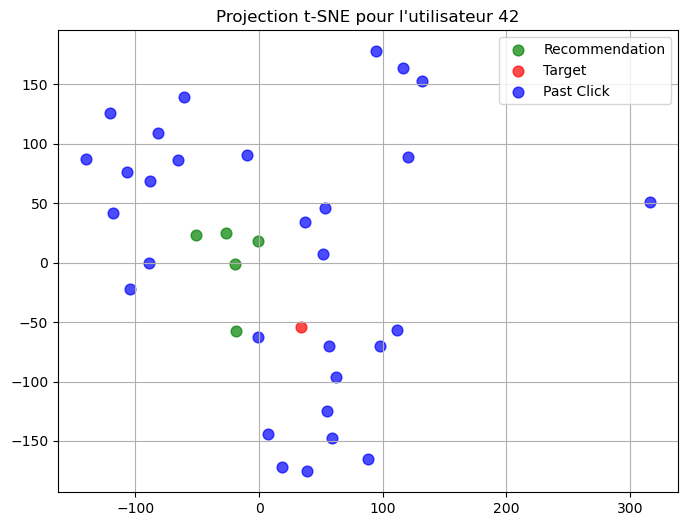

In [17]:
visualize_user_recommendations(
    user_id=42,
    user_clicks_df=user_clicks_df,
    embedding_dict=embedding_dict,
    article_ids=article_ids,
    article_embeddings=article_embeddings,
    df=df,  # dataframe avec 'click_article_id' et 'click_timestamp'
    top_n=5
)


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

def plot_similarity_heatmap(mean_embedding, embedding_dict, past_article_ids, target_article_id, recommended_ids, title="Similarité cosinus"):
    """
    Affiche une heatmap des similarités entre le vecteur moyen utilisateur et :
    - les articles cliqués
    - l’article cible
    - les articles recommandés
    """
    # Liste des articles à comparer
    items = past_article_ids + [target_article_id] + recommended_ids
    labels = (
        [f"past_{i}" for i in range(len(past_article_ids))] +
        ["target"] +
        [f"rec_{i}" for i in range(len(recommended_ids))]
    )

    # Embeddings des articles
    vectors = [embedding_dict[aid] for aid in items if aid in embedding_dict]

    # Similarités cosinus entre le profil utilisateur et chaque vecteur
    sims = cosine_similarity(mean_embedding, np.stack(vectors))[0]

    # Affichage
    plt.figure(figsize=(12, 1.5))
    ax = sns.heatmap(
        sims.reshape(1, -1),
        annot=True,
        fmt=".2f",
        xticklabels=labels,
        yticklabels=["user_profile"],
        cmap="YlGnBu",
        cbar=False
    )
    plt.title(title)
    plt.yticks(rotation=0)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


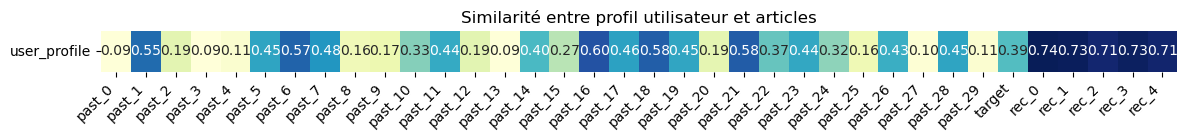

In [19]:
selected_user, clicked_article_ids, past_ids, target_id, mean_embed = prepare_user_data(
    user_clicks_df, embedding_dict, user_id=42
)

recommendations, _ = predict_topN_articles(
    user_id=42,
    df=df,
    embedding_dict=embedding_dict,
    article_ids=article_ids,
    article_embeddings=article_embeddings,
    top_n=5
)

recommended_ids = [aid for aid, _ in recommendations]

plot_similarity_heatmap(
    mean_embedding=mean_embed,
    embedding_dict=embedding_dict,
    past_article_ids=past_ids,
    target_article_id=target_id,
    recommended_ids=recommended_ids,
    title="Similarité entre profil utilisateur et articles"
)


Le modèle même le plus simple prédit des éléments très similaires au profil moyen mais l'utilisateur agit autrement (sollicitation externe, influence non modélisée)

## Fonctions de visualisation avancées (histogramme de similarité, TSNE) clics, embedding moyen, clic réel, top-N prédition

In [51]:
def plot_target_similarity_distribution(user_clicks_df, df, embedding_dict, article_ids, article_embeddings, n_users=500):
    import matplotlib.pyplot as plt
    from sklearn.metrics.pairwise import cosine_similarity
    import numpy as np

    sims = []
    all_users = user_clicks_df[user_clicks_df['clicked_article_ids'].apply(len) > 1]['user_id'].tolist()
    users = np.random.choice(all_users, size=min(n_users, len(all_users)), replace=False)

    for user_id in users:
        clicks = df[df["user_id"] == user_id].sort_values("click_timestamp")["click_article_id"].tolist()
        if len(clicks) < 2:
            continue
        target = clicks[-1]
        past = clicks[:-1]
        past_vecs = [embedding_dict[aid] for aid in past if aid in embedding_dict]
        if target not in embedding_dict or not past_vecs:
            continue
        profile = np.mean(past_vecs, axis=0).reshape(1, -1)
        sim = cosine_similarity(profile, embedding_dict[target].reshape(1, -1))[0][0]
        sims.append(sim)

    sims = np.array(sims)
    q25, q50, q75 = np.percentile(sims, [25, 50, 75])

    colors = ['red' if s < q25 else 'orange' if s < q50 else 'skyblue' if s < q75 else 'green' for s in sims]

    plt.figure(figsize=(10, 5))
    plt.hist(sims, bins=30, color='gray', edgecolor='black', alpha=0.3)
    for color, label in zip(['red', 'orange', 'skyblue', 'green'], ['< Q1', 'Q1–Q2', 'Q2–Q3', '> Q3']):
        plt.axvspan(
            {'red': sims.min(), 'orange': q25, 'skyblue': q50, 'green': q75}[color],
            {'red': q25, 'orange': q50, 'skyblue': q75, 'green': sims.max()}[color],
            color=color, alpha=0.2, label=label
        )

    plt.title("Distribution des similarités profil ↔ target (colorée par quartiles)")
    plt.xlabel("Similarité cosinus")
    plt.ylabel("Nombre d'utilisateurs")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print(f"Moyenne des similarités : {np.mean(sims):.4f}")
    print(f"Médiane : {np.median(sims):.4f}")


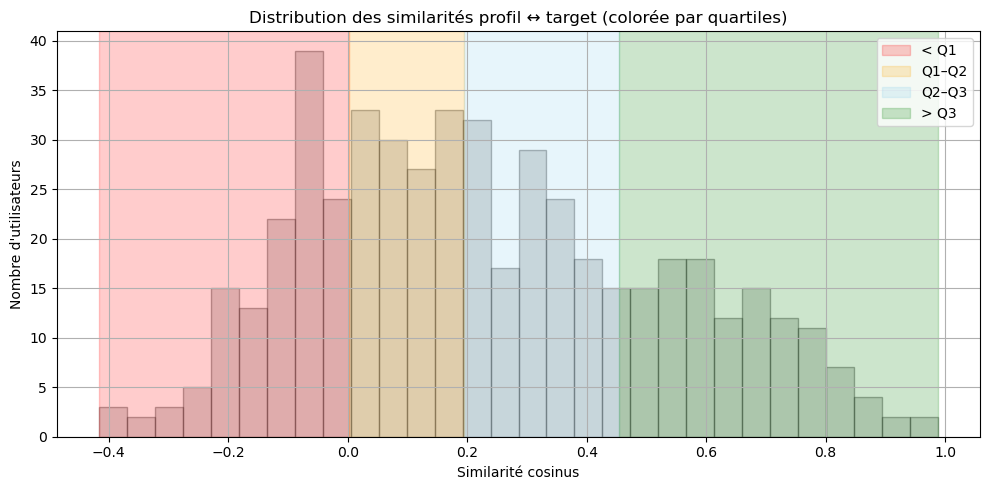

Moyenne des similarités : 0.2316
Médiane : 0.1941


In [52]:
plot_target_similarity_distribution(user_clicks_df, df, embedding_dict, article_ids, article_embeddings)


In [20]:
def plot_score_distribution(scores_df, target_article_id, top_preds=None, score_col="score", title=None):
    """
    Histogramme des scores avec lignes pour :
    - l’article réellement cliqué
    - les top prédictions

    Ajoute :
    - Dégradé de couleurs pour les prédictions
    - Affichage des stats (médiane, score target, etc.)
    """
    import matplotlib.pyplot as plt
    import seaborn as sns

    score_values = scores_df[score_col].values

    plt.figure(figsize=(10, 6))
    sns.histplot(score_values, bins=100, kde=False, color="steelblue", label="Distribution des scores", alpha=0.6)

    # Lignes : prédictions
    if top_preds is not None:
        top_preds = top_preds.rename(columns={"similarity": "score"})
        for i, row in top_preds.iterrows():
            color = "purple" if i == 0 else "green"
            alpha = 1.0 if i == 0 else 0.5
            label = "Top-1 prédiction" if i == 0 else ("Autres prédictions" if i == 1 else None)
            plt.axvline(row["score"], color=color, linestyle="--", linewidth=2, alpha=alpha, label=label)

    # Ligne : clic réel
    if target_article_id in scores_df["article_id"].values:
        target_score = scores_df.loc[scores_df["article_id"] == target_article_id, score_col].values[0]
        plt.axvline(target_score, color="red", linestyle="-", linewidth=2, label="Clic réel")

        # Calcul du rang du target
        target_rank = (score_values > target_score).sum() + 1
        total = len(score_values)
    else:
        target_score = None
        target_rank = None
        total = None

    # Titre et axes
    plt.title(title or "Distribution des scores du modèle")
    plt.xlabel("Score de similarité")
    plt.ylabel("Nombre d'articles")
    plt.grid(True)

    # Légende unique
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())

    plt.tight_layout()
    plt.show()

    # Infos supplémentaires
    if target_score is not None:
        print(f"Score de l’article cliqué : {target_score:.4f}")
        print(f"Rang du clic réel : {target_rank} / {total}")
        print(f"Score médian global : {np.median(score_values):.4f}")
        if top_preds is not None:
            print(f"Score moyen top-{len(top_preds)} : {top_preds['score'].mean():.4f}")


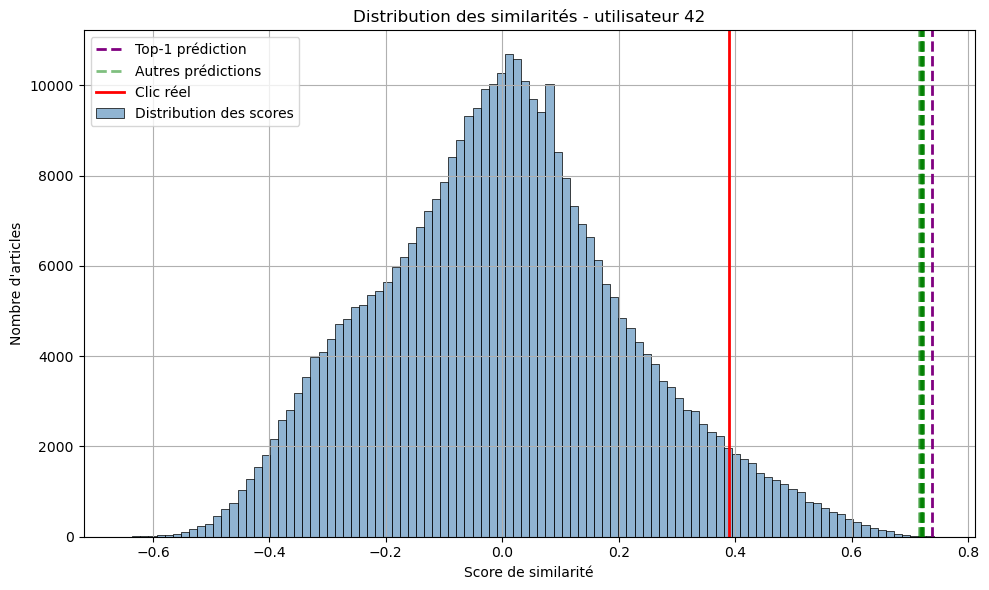

Score de l’article cliqué : 0.3898
Rang du clic réel : 17767 / 364047
Score médian global : -0.0004
Score moyen top-10 : 0.7217


In [21]:
# Exemple avec l'utilisateur choisi
# Étape 1 : Préparer les données utilisateur
selected_user, clicked_article_ids, past_ids, target_id, mean_embed = prepare_user_data(
    user_clicks_df, embedding_dict, user_id=42
)

# Étape 2 : Calculer les similarités avec tous les articles
from sklearn.metrics.pairwise import cosine_similarity

all_similarities = cosine_similarity(mean_embed, article_embeddings)[0]
scores_df = pd.DataFrame({
    "article_id": article_ids,
    "score": all_similarities
})

# Étape 3 : Obtenir les prédictions du modèle (top-N)
top_preds, _ = predict_topN_articles(
    user_id=42,
    df=df,
    embedding_dict=embedding_dict,
    article_ids=article_ids,
    article_embeddings=article_embeddings,
    top_n=10
)

top_preds_df = pd.DataFrame(top_preds, columns=["article_id", "similarity"])

# Étape 4 : Visualisation de la distribution des scores
plot_score_distribution(
    scores_df=scores_df,
    target_article_id=target_id,
    top_preds=top_preds_df,
    score_col="score",
    title="Distribution des similarités - utilisateur 42"
)


In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from scipy.spatial import ConvexHull

def plot_tsne_visualization(
    embeddings_df,
    past_article_ids,
    target_article_id,
    top_preds=None,
    mean_embedding=None,
    show_labels=True
):
    """
    Visualisation t-SNE enrichie :
    - clics utilisateur
    - clic réel
    - top-k prédictions
    - vecteur moyen
    - zone d'intérêt (convex hull)
    """

    # Articles à projeter
    articles_to_plot = past_article_ids + [target_article_id]
    if top_preds is not None:
        articles_to_plot += top_preds["article_id"].tolist()

    unique_articles_to_plot = list(dict.fromkeys(articles_to_plot))  # garde l’ordre

    label_map = {aid: "click" for aid in past_article_ids}

    if mean_embedding is not None:
        include_mean = True
    else:
        include_mean = False

    plot_embeddings = embeddings_df.loc[unique_articles_to_plot].copy()

    if include_mean:
        mean_df = pd.DataFrame(mean_embedding, columns=plot_embeddings.columns, index=["mean"])
        plot_embeddings = pd.concat([plot_embeddings, mean_df])
        label_map["mean"] = "mean"

    # Structuration stable
    plot_embeddings = plot_embeddings.reset_index(drop=False).rename(columns={"index": "article_id"})
    plot_embeddings["label"] = plot_embeddings["article_id"].map(label_map).fillna("other")
    plot_embeddings = plot_embeddings.set_index("article_id")

    # t-SNE projection
    tsne_input = plot_embeddings.drop(columns="label").values.astype(np.float32)
    tsne = TSNE(n_components=2, random_state=42, perplexity=min(5, len(tsne_input)-1), n_iter=1000, init='pca')
    tsne_proj = tsne.fit_transform(tsne_input)

    tsne_df = pd.DataFrame(tsne_proj, index=plot_embeddings.index, columns=["Dim1", "Dim2"])
    tsne_df["label"] = plot_embeddings["label"]

    # Affichage
    plt.figure(figsize=(10, 8))

    # Convex Hull (zone d’intérêt utilisateur)
    click_points = tsne_df[tsne_df["label"] == "click"][["Dim1", "Dim2"]].values
    if len(click_points) >= 3:
        hull = ConvexHull(click_points)
        for simplex in hull.simplices:
            plt.plot(click_points[simplex, 0], click_points[simplex, 1], 'gray', linestyle="--", alpha=0.5)

    # Scatter enrichi
    for idx, row in tsne_df.iterrows():
        label = row["label"]
        if label == "mean":
            plt.scatter(row["Dim1"], row["Dim2"], color="green", s=160, marker="X", label="Vecteur moyen")
        elif idx == target_article_id:
            plt.scatter(row["Dim1"], row["Dim2"], color="red", s=160, marker="D", label="Clic réel")
            if show_labels:
                plt.text(row["Dim1"] + 1, row["Dim2"], f"target {idx}", fontsize=9, color="red")
        elif top_preds is not None and idx in top_preds["article_id"].values:
            if idx == top_preds.iloc[0]["article_id"]:
                plt.scatter(row["Dim1"], row["Dim2"], color="purple", s=140, marker="*", label="Top-1 prédiction")
                if show_labels:
                    plt.text(row["Dim1"] + 1, row["Dim2"], f"top-1 {idx}", fontsize=9, color="purple")
            else:
                plt.scatter(row["Dim1"], row["Dim2"], color="lightgreen", s=120, marker="P", label="Autre prédiction")
        elif label == "click":
            plt.scatter(row["Dim1"], row["Dim2"], color="orange", s=90, alpha=0.8, marker="o", label="Clic utilisateur")
        else:
            plt.scatter(row["Dim1"], row["Dim2"], color="gray", s=60, alpha=0.4)

    # Légende sans doublon
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), fontsize=9)

    plt.title("t-SNE des préférences utilisateur & recommandations", fontsize=14)
    plt.xlabel("Dim 1")
    plt.ylabel("Dim 2")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


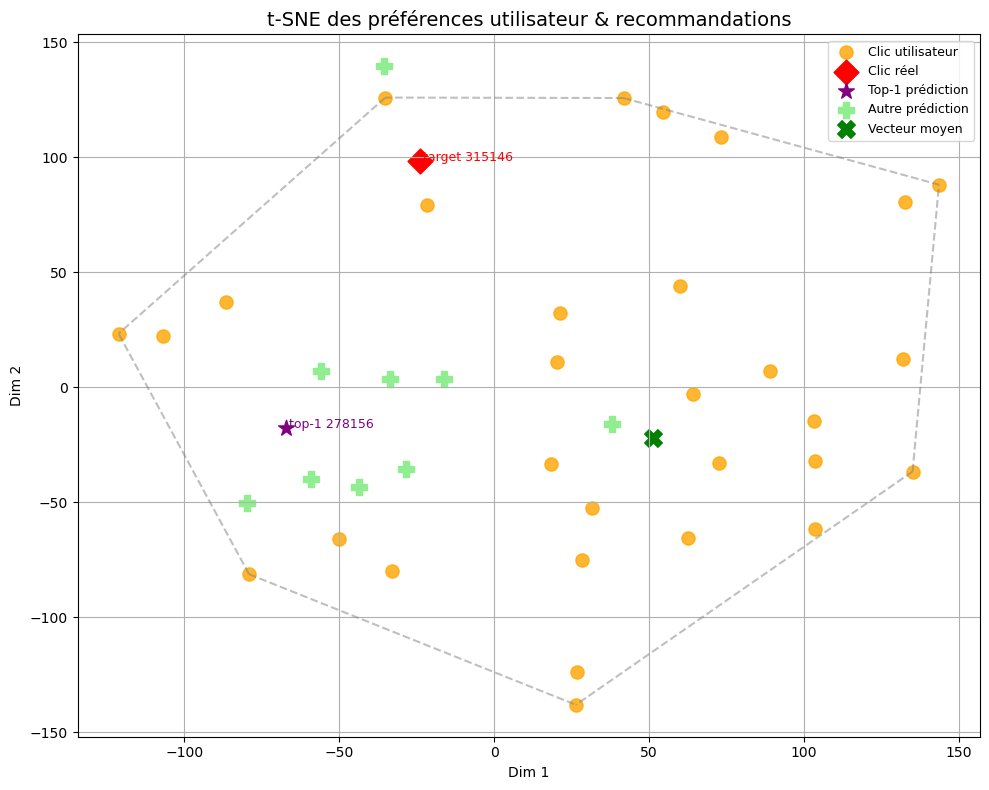

In [23]:
plot_tsne_visualization(
    embeddings_df=embeddings_df,
    past_article_ids=past_ids,
    target_article_id=target_id,
    top_preds=top_preds_df,
    mean_embedding=mean_embed
)


## Visualisation pour un utilisateur au hasard

In [24]:
def analyze_user_recommendation(
    user_clicks_df,
    df,
    embeddings_df,
    embedding_dict,
    article_ids,
    article_embeddings,
    user_id=None,
    top_n=5,
    debug=True
):
    """
    Fonction complète d’analyse et de visualisation :
    - Sélection d’un utilisateur (ou aléatoire)
    - Calcul des similarités
    - Génération des recommandations
    - Visualisation heatmap + histogramme + t-SNE

    Paramètres :
    - user_clicks_df : DataFrame pré-agrégée avec clicked_article_ids
    - df : DataFrame des clics (avec created_at_ts)
    - embeddings_df : DataFrame indexé par article_id
    - embedding_dict : dictionnaire article_id → embedding numpy
    - article_ids : np.array des articles
    - article_embeddings : np.array des embeddings
    - user_id : (optionnel) utilisateur ciblé
    - top_n : nombre de recommandations
    - debug : affiche les infos utilisateur
    """

    import matplotlib.pyplot as plt
    from sklearn.metrics.pairwise import cosine_similarity
    import pandas as pd

    # 1. Sélection utilisateur + données
    selected_user, clicked_article_ids, past_ids, target_id, mean_embed = prepare_user_data(
        user_clicks_df, embedding_dict, user_id=user_id, debug=debug
    )

    # 2. Similarités avec tous les articles
    all_similarities = cosine_similarity(mean_embed, article_embeddings)[0]
    scores_df = pd.DataFrame({
        "article_id": article_ids,
        "score": all_similarities
    })

    # 3. Recommandations
    top_preds, _ = predict_topN_articles(
        user_id=selected_user,
        df=df,
        embedding_dict=embedding_dict,
        article_ids=article_ids,
        article_embeddings=article_embeddings,
        top_n=top_n
    )
    top_preds_df = pd.DataFrame(top_preds, columns=["article_id", "similarity"])

    # 4. Visualisation heatmap (affiche dans son propre plt.figure)
    print("\n📊 Heatmap des similarités :")
    plot_similarity_heatmap(
        mean_embedding=mean_embed,
        embedding_dict=embedding_dict,
        past_article_ids=past_ids,
        target_article_id=target_id,
        recommended_ids=top_preds_df["article_id"].tolist(),
        title=f"User {selected_user} - Similarités avec le profil"
    )

    # 5. Affichage séparé pour histogramme
    from copy import deepcopy
    _top_preds_df = deepcopy(top_preds_df)
    print("\n📉 Histogramme des scores :")
    plot_score_distribution(
        scores_df=scores_df,
        target_article_id=target_id,
        top_preds=_top_preds_df,
        score_col="score",
        title="Distribution des scores du modèle"
    )

    # 6. Affichage séparé pour t-SNE
    print("\n🧭 Projection t-SNE :")
    plot_tsne_visualization(
        embeddings_df=embeddings_df,
        past_article_ids=past_ids,
        target_article_id=target_id,
        top_preds=top_preds_df,
        mean_embedding=mean_embed,
        show_labels=True
    )

Utilisateur sélectionné : 42
Nombre total de clics : 31
Article cible : 315146
Articles précédents : [145166, 284346, 157861, 75825, 107216, 313996, 285331, 336380, 129434, 225019, 208518, 119193, 226595, 71608, 336221, 226648, 352902, 288457, 336220, 353673, 235854, 284178, 292749, 285414, 119534, 9126, 331116, 158541, 292594, 218028]

📊 Heatmap des similarités :


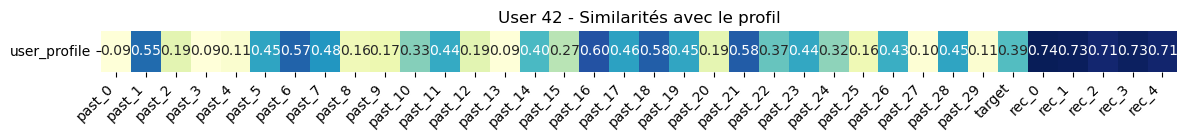


📉 Histogramme des scores :


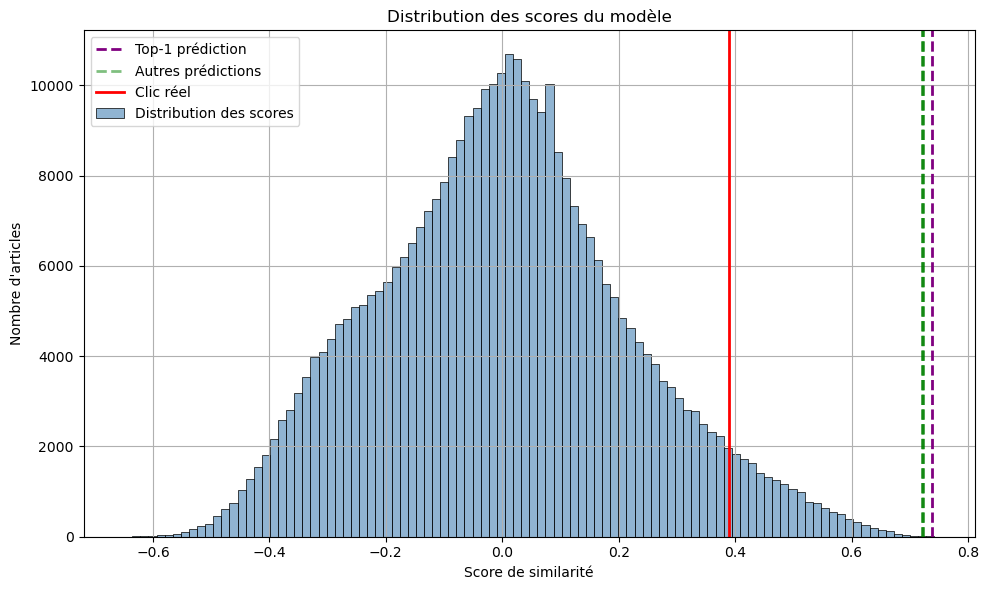

Score de l’article cliqué : 0.3898
Rang du clic réel : 17767 / 364047
Score médian global : -0.0004
Score moyen top-5 : 0.7249

🧭 Projection t-SNE :


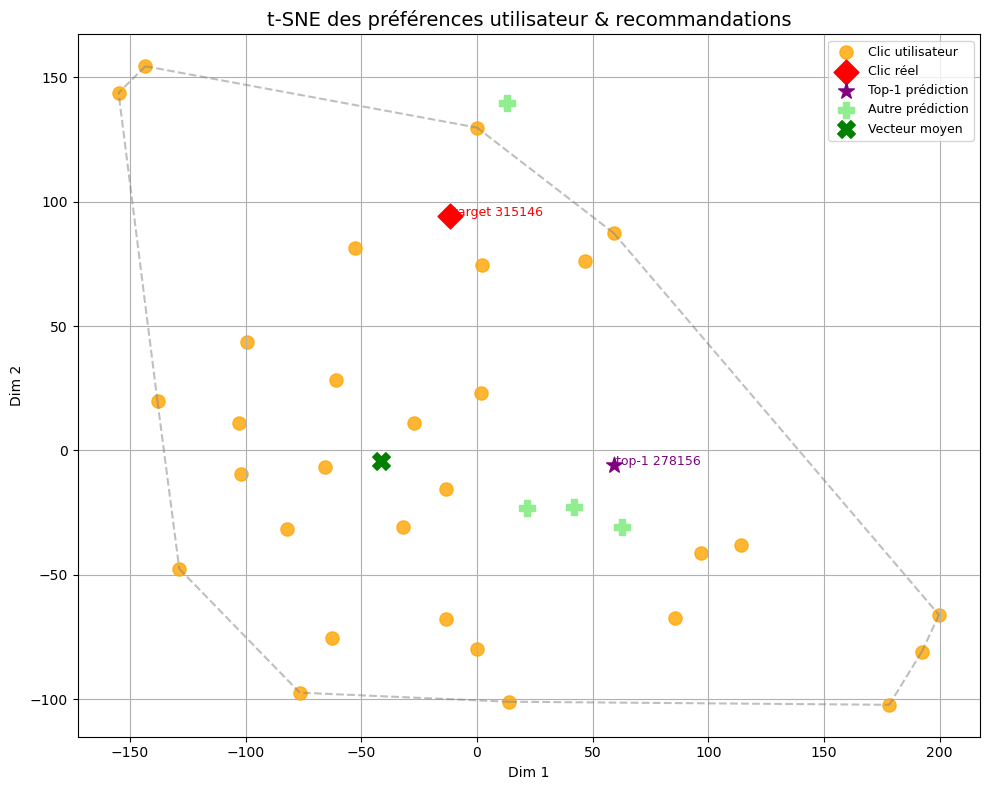

In [25]:
analyze_user_recommendation(
    user_clicks_df=user_clicks_df,
    df=df,
    embeddings_df=embeddings_df,
    embedding_dict=embedding_dict,
    article_ids=article_ids,
    article_embeddings=article_embeddings,
    user_id=42 # ou None
)


In [26]:
def analyze_user_recommendation_recency(
    user_clicks_df,
    df,
    embeddings_df,
    embedding_dict,
    article_ids,
    article_embeddings,
    user_id=None,
    top_n=5,
    debug=True,
    alpha=0.9,
    beta=1.0
):
    """
    Fonction complète d’analyse et de visualisation avec pondération temporelle :
    - Sélection d’un utilisateur (ou aléatoire)
    - Calcul des similarités pondérées par la récence
    - Génération des recommandations
    - Visualisation heatmap + histogramme + t-SNE

    Paramètres :
    - user_clicks_df : DataFrame pré-agrégée avec clicked_article_ids
    - df : DataFrame des clics (avec created_at_ts)
    - embeddings_df : DataFrame indexé par article_id
    - embedding_dict : dictionnaire article_id → embedding numpy
    - article_ids : np.array des articles
    - article_embeddings : np.array des embeddings
    - user_id : (optionnel) utilisateur ciblé
    - top_n : nombre de recommandations
    - debug : affiche les infos utilisateur
    - alpha : pondération temporelle des clics
    - beta : pondération temporelle des articles recommandés
    """

    import matplotlib.pyplot as plt
    import pandas as pd

    # 1. Sélection utilisateur + données
    selected_user, clicked_article_ids, past_ids, target_id, mean_embed = prepare_user_data(
        user_clicks_df, embedding_dict, user_id=user_id, debug=debug
    )

    # 2. Recommandations avec pondération temporelle
    top_preds, _ = predict_topN_weighted_by_recency(
        user_id=selected_user,
        df=df,
        embedding_dict=embedding_dict,
        article_ids=article_ids,
        article_embeddings=article_embeddings,
        alpha=alpha,
        beta=beta,
        top_n=top_n
    )
    top_preds_df = pd.DataFrame(top_preds, columns=["article_id", "score"])

    # 3. Similarités avec tous les articles pour histogramme
    from sklearn.metrics.pairwise import cosine_similarity
    all_similarities = cosine_similarity(mean_embed, article_embeddings)[0]
    scores_df = pd.DataFrame({
        "article_id": article_ids,
        "score": all_similarities
    })

    # 4. Visualisation heatmap (affiche dans son propre plt.figure)
    print("\n📊 Heatmap des similarités :")
    plot_similarity_heatmap(
        mean_embedding=mean_embed,
        embedding_dict=embedding_dict,
        past_article_ids=past_ids,
        target_article_id=target_id,
        recommended_ids=top_preds_df["article_id"].tolist(),
        title=f"User {selected_user} - Similarités avec le profil (pondéré)"
    )

    # 5. Affichage séparé pour histogramme
    from copy import deepcopy
    _top_preds_df = deepcopy(top_preds_df)
    print("\n📉 Histogramme des scores :")
    plot_score_distribution(
        scores_df=scores_df,
        target_article_id=target_id,
        top_preds=_top_preds_df.rename(columns={"score": "similarity"}),
        score_col="score",
        title="Distribution des scores du modèle (non pondéré)"
    )

    # 6. Affichage séparé pour t-SNE
    print("\n🧭 Projection t-SNE :")
    plot_tsne_visualization(
        embeddings_df=embeddings_df,
        past_article_ids=past_ids,
        target_article_id=target_id,
        top_preds=top_preds_df,
        mean_embedding=mean_embed,
        show_labels=True
    )


Utilisateur sélectionné : 10307
Nombre total de clics : 8
Article cible : 63672
Articles précédents : [63756, 63683, 70646, 272143, 63759, 63691, 63746]

📊 Heatmap des similarités :


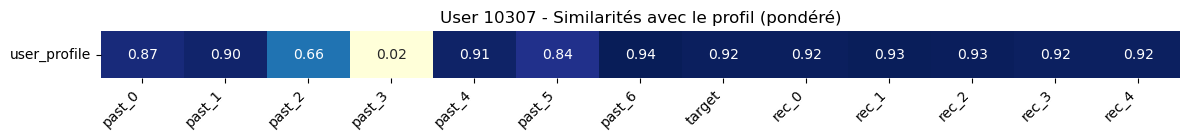


📉 Histogramme des scores :


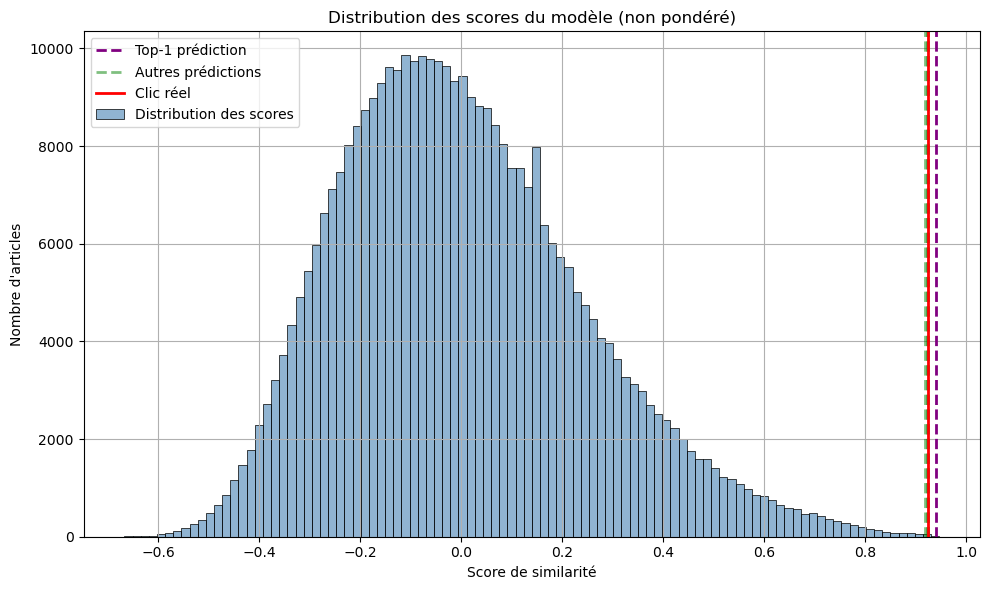

Score de l’article cliqué : 0.9244
Rang du clic réel : 23 / 364047
Score médian global : -0.0228
Score moyen top-5 : 0.9259

🧭 Projection t-SNE :


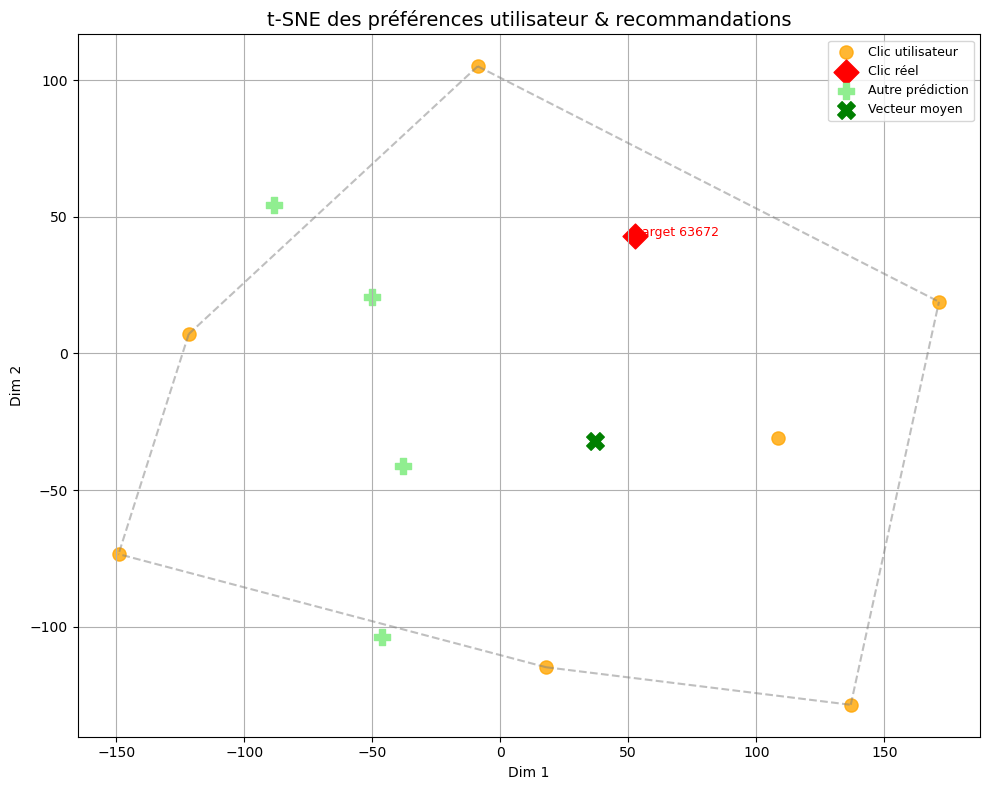

In [74]:
analyze_user_recommendation_recency(
    user_clicks_df=user_clicks_df,
    df=df,
    embeddings_df=embeddings_df,
    embedding_dict=embedding_dict,
    article_ids=article_ids,
    article_embeddings=article_embeddings,
    user_id=10307,
    top_n=5,
    alpha=0.85,
    beta=1.2
)


# Métriques pour un échantillon d'utilisateurs

In [75]:
def evaluate_prediction_functions(
    user_clicks_df,
    df,
    embedding_dict,
    article_ids,
    article_embeddings,
    predict_functions,
    k=5,
    n_users=100,
    seed=42
):
    """
    Évalue des fonctions de prédiction qui retournent :
    - top_k_preds : liste d’IDs recommandés
    - target_article_id : article réellement cliqué à prédire

    Si n_users=None, évalue tous les utilisateurs valides.

    Mesures : Hit@k, MAP@k, NDCG@k
    Retourne :
    - DataFrame récapitulatif des scores
    - Dictionnaire {modèle: liste des user_ids avec hit}
    """
    import numpy as np
    import pandas as pd
    from sklearn.metrics import ndcg_score
    from tqdm import tqdm

    np.random.seed(seed)
    all_users = user_clicks_df[user_clicks_df['clicked_article_ids'].apply(len) > 1]['user_id'].tolist()
    if n_users is None:
        sampled_users = all_users
    else:
        sampled_users = np.random.choice(all_users, size=min(n_users, len(all_users)), replace=False)

    results = {name: {"hit@k": [], "map@k": [], "ndcg@k": []} for name in predict_functions.keys()}
    hit_users = {name: [] for name in predict_functions.keys()}

    for user_id in tqdm(sampled_users, desc="Évaluation des modèles"):
        for name, predict_func in predict_functions.items():
            try:
                top_preds, target = predict_func(
                    user_id, df, embedding_dict, article_ids, article_embeddings)
                if top_preds is None or target is None:
                    continue

                top_ids = [aid for aid, _ in top_preds[:k]]

                # Hit@k
                hit = int(target in top_ids)
                if hit:
                    print(f"✅ HIT trouvé pour user {user_id} avec le modèle '{name}' (target: {target})")
                    hit_users[name].append(user_id)

                # MAP@k
                map_k = 0.0
                for i, aid in enumerate(top_ids):
                    if aid == target:
                        map_k = 1.0 / (i + 1)
                        break

                # NDCG@k
                relevance = [1 if aid == target else 0 for aid in top_ids]
                ndcg = ndcg_score([relevance], [list(reversed(range(len(relevance))))])

                results[name]["hit@k"].append(hit)
                results[name]["map@k"].append(map_k)
                results[name]["ndcg@k"].append(ndcg)

            except Exception as e:
                print(f"Erreur dans {name} pour user {user_id} : {e}")

    # Résumé
    summary = []
    for name, scores in results.items():
        summary.append({
            "modèle": name,
            f"Hit@{k}": np.mean(scores["hit@k"]),
            f"MAP@{k}": np.mean(scores["map@k"]),
            f"NDCG@{k}": np.mean(scores["ndcg@k"])
        })

    return pd.DataFrame(summary).sort_values(f"Hit@{k}", ascending=False), hit_users


🧠 Pour juger si un modèle est meilleur, il faut des métriques objectives :<br>
✅ 1. Hit@k (ou Top-k Accuracy)

    Est-ce que l’article réellement cliqué (le target_article_id) apparaît dans les k articles recommandés ?

Par exemple :

    Si target_article_id ∈ top_preds, alors c’est un Hit@5 = 1
    Sinon, Hit@5 = 0

On calcule ça pour chaque utilisateur et on prend la moyenne globale → c’est LA métrique de base pour ce type de système.

✅ 2. MRR (Mean Reciprocal Rank)

    Quelle est la position du bon article dans la liste triée ? Plus il est haut, mieux c’est.
    
    NDCG@k (Normalized Discounted Cumulative Gain) est une variante pondérée de MRR : récompense davantage un bon article très haut dans la liste.

🎯 Mécanisme général

Tu compares, pour chaque utilisateur :

    🔍 Les articles recommandés (prédits par ton modèle)

    ✅ Les articles réellement cliqués plus tard (dans un ensemble de test)

    ⚠️ Il faut souvent découper les données temporellement : entraînement (ancien) vs test (récent)

🔢 1. Precision@k
🔎 Ce que ça mesure :

Parmi les k articles recommandés, combien étaient vraiment pertinents (présents dans les clics test).

precision = nb_recommandations_correctes / k

✅ Avantages :

    Simple à interpréter

    Idéal pour mesurer la qualité du top-k

⚠️ Inconvénients :

    Ne tient pas compte des articles oubliés (faux négatifs)

    Ne favorise pas la diversité

🔢 2. Recall@k
🔎 Ce que ça mesure :

Parmi les articles pertinents, combien ont été retrouvés dans le top-k recommandé.

recall = nb_recommandations_correctes / nb_articles_test

✅ Avantages :

    Montre ce qu'on rate

    Bien pour évaluer un système complet (rappel de tout ce que l’utilisateur aurait aimé)

⚠️ Inconvénients :

    Moins utile quand nb_articles_test est très petit (souvent le cas ici)

🔢 3. F1@k
🔎 F1 combine Precision@k et Recall@k (harmonique)

F1 = 2 * (precision * recall) / (precision + recall)

✅ Avantages :

    Bon compromis quand tu veux optimiser les deux

🔢 4. Mean Average Precision (MAP@k)
🔎 Ce que ça mesure :

    Moyenne des précisions cumulées au fur et à mesure des bons articles trouvés dans le top-k

    Plus un bon article est en haut, mieux c’est

MAP = moyenne de [average_precision@k par utilisateur]

✅ Avantages :

    Prend en compte l’ordre des recommandations

    Favorise les recommandations bien classées

⚠️ Inconvénients :

    Moins intuitif

    Peut être 0 si aucun article pertinent n’est dans le top-k

🔢 5. NDCG@k (Normalized Discounted Cumulative Gain)
🔎 Ce que ça mesure :

    Gain cumulatif des articles pertinents, pondéré par la position

NDCG@k = DCG@k / IDCG@k

    DCG = score réel

    IDCG = score optimal (tous les bons articles au top)

✅ Avantages :

    Très populaire en production

    Sensible à l’ordre de pertinence

⚠️ Inconvénients :

    Un peu plus mathématique à implémenter

    Pas toujours nécessaire pour un MVP

🔢 6. Coverage
🔎 Ce que ça mesure :

    Pourcentage des articles du catalogue qui sont recommandés au moins une fois

✅ Avantages :

    Mesure la diversité globale du système

    Utile pour éviter que le modèle ne recommande toujours les mêmes articles

🔢 7. Diversity / Novelty
🔎 Ce que ça mesure :

    Diversity : les articles recommandés sont-ils différents entre eux ?

    Novelty : les articles recommandés sont-ils inhabituels, peu populaires ?

✅ Avantages :

    Évalue la capacité du modèle à surprendre, explorer

    Important pour éviter le biais de popularité

🔍 En résumé
| **Métrique**   | **Évalue…**                   | **Quand l'utiliser ?**                                 |
|----------------|-------------------------------|---------------------------------------------------------|
| Precision@k    | Qualité du top-k              | Tu veux des recommandations fiables                    |
| Recall@k       | Taux de "bons" retrouvés      | Tu veux couvrir tout ce que l’utilisateur aime         |
| F1@k           | Compromis précision/rappel    | Tu veux optimiser les deux                             |
| MAP@k          | Qualité et ordre              | Tu veux prioriser les bons articles en haut            |
| NDCG@k         | Ordre et pertinence           | Tu veux un ranking de qualité                          |
| Coverage       | Diversité globale             | Tu veux explorer plus que les articles connus          |
| Diversity      | Reco ≠ entre elles            | Tu veux éviter la redondance                           |
| Novelty        | Surprise / exploration        | Tu veux pousser du contenu peu populaire               |


## Embeddings de tous les articles

In [83]:
# nombre de prédictions
k = 5
predict_functions = {
    "Non pondéré": lambda uid, df, emb_dict, ids, embs: predict_topN_articles(
        uid, df, emb_dict, ids, embs, top_n=k),
    "Pondéré récence": lambda uid, df, emb_dict, ids, embs: predict_topN_weighted_by_recency(
        uid, df, emb_dict, ids, embs, alpha=0.9, beta=1.0, top_n=k),
    "Clic aléatoire": lambda uid, df, emb_dict, ids, embs: predict_random_target(
        uid, df, emb_dict, ids, embs, top_n=k, seed=42),
    "Clic aléatoire pondéré": lambda uid, df, emb_dict, ids, embs: predict_random_target_weighted(
        uid, df, emb_dict, ids, embs, top_n=k, alpha=0.9, beta=1.0, seed=42)
}

results_df, hit_users = evaluate_prediction_functions(
    user_clicks_df=user_clicks_df,
    df=df,
    embedding_dict=embedding_dict,
    article_ids=article_ids,
    article_embeddings=article_embeddings,
    predict_functions=predict_functions,
    k=k,
    n_users=1000
)

Évaluation des modèles:   5%|▌         | 53/1000 [00:58<17:33,  1.11s/it]

✅ HIT trouvé pour user 26590 avec le modèle 'Clic aléatoire pondéré' (target: 72334)


Évaluation des modèles:  10%|█         | 105/1000 [01:57<16:33,  1.11s/it]

✅ HIT trouvé pour user 87373 avec le modèle 'Pondéré récence' (target: 160974)


Évaluation des modèles:  14%|█▎        | 137/1000 [02:32<16:15,  1.13s/it]

✅ HIT trouvé pour user 149520 avec le modèle 'Clic aléatoire pondéré' (target: 161602)


Évaluation des modèles:  15%|█▌        | 154/1000 [02:51<15:47,  1.12s/it]

✅ HIT trouvé pour user 227294 avec le modèle 'Pondéré récence' (target: 128551)


Évaluation des modèles:  16%|█▌        | 157/1000 [02:55<15:48,  1.12s/it]

✅ HIT trouvé pour user 46708 avec le modèle 'Clic aléatoire pondéré' (target: 50715)


Évaluation des modèles:  16%|█▌        | 161/1000 [02:59<15:34,  1.11s/it]

✅ HIT trouvé pour user 283101 avec le modèle 'Pondéré récence' (target: 353673)


Évaluation des modèles:  20%|██        | 203/1000 [03:46<14:42,  1.11s/it]

✅ HIT trouvé pour user 119442 avec le modèle 'Clic aléatoire pondéré' (target: 160132)


Évaluation des modèles:  25%|██▍       | 248/1000 [04:36<14:05,  1.12s/it]

✅ HIT trouvé pour user 322362 avec le modèle 'Clic aléatoire pondéré' (target: 111738)


Évaluation des modèles:  25%|██▌       | 252/1000 [04:41<14:00,  1.12s/it]

✅ HIT trouvé pour user 290575 avec le modèle 'Pondéré récence' (target: 333150)


Évaluation des modèles:  25%|██▌       | 253/1000 [04:42<14:03,  1.13s/it]

✅ HIT trouvé pour user 290575 avec le modèle 'Clic aléatoire pondéré' (target: 336245)


Évaluation des modèles:  39%|███▉      | 389/1000 [07:14<11:19,  1.11s/it]

✅ HIT trouvé pour user 150176 avec le modèle 'Clic aléatoire pondéré' (target: 207994)


Évaluation des modèles:  43%|████▎     | 432/1000 [08:02<10:38,  1.12s/it]

✅ HIT trouvé pour user 92446 avec le modèle 'Non pondéré' (target: 160974)
✅ HIT trouvé pour user 92446 avec le modèle 'Pondéré récence' (target: 160974)
✅ HIT trouvé pour user 92446 avec le modèle 'Clic aléatoire' (target: 160974)


Évaluation des modèles:  43%|████▎     | 433/1000 [08:03<10:41,  1.13s/it]

✅ HIT trouvé pour user 92446 avec le modèle 'Clic aléatoire pondéré' (target: 160974)


Évaluation des modèles:  72%|███████▏  | 721/1000 [13:26<05:13,  1.12s/it]

✅ HIT trouvé pour user 243097 avec le modèle 'Non pondéré' (target: 123290)
✅ HIT trouvé pour user 243097 avec le modèle 'Pondéré récence' (target: 123290)
✅ HIT trouvé pour user 243097 avec le modèle 'Clic aléatoire' (target: 124350)


Évaluation des modèles:  72%|███████▏  | 722/1000 [13:27<05:13,  1.13s/it]

✅ HIT trouvé pour user 243097 avec le modèle 'Clic aléatoire pondéré' (target: 124350)


Évaluation des modèles:  74%|███████▍  | 738/1000 [13:45<04:55,  1.13s/it]

✅ HIT trouvé pour user 27505 avec le modèle 'Clic aléatoire' (target: 124352)


Évaluation des modèles:  74%|███████▍  | 739/1000 [13:46<04:54,  1.13s/it]

✅ HIT trouvé pour user 27505 avec le modèle 'Clic aléatoire pondéré' (target: 124352)


Évaluation des modèles:  75%|███████▍  | 749/1000 [13:57<04:38,  1.11s/it]

✅ HIT trouvé pour user 301618 avec le modèle 'Clic aléatoire pondéré' (target: 60009)


Évaluation des modèles:  77%|███████▋  | 768/1000 [14:18<04:18,  1.12s/it]

✅ HIT trouvé pour user 69606 avec le modèle 'Pondéré récence' (target: 50917)


Évaluation des modèles:  77%|███████▋  | 769/1000 [14:19<04:17,  1.12s/it]

✅ HIT trouvé pour user 69606 avec le modèle 'Clic aléatoire pondéré' (target: 50918)


Évaluation des modèles:  78%|███████▊  | 778/1000 [14:29<04:10,  1.13s/it]

✅ HIT trouvé pour user 65344 avec le modèle 'Clic aléatoire pondéré' (target: 32467)


Évaluation des modèles:  85%|████████▌ | 850/1000 [15:50<02:48,  1.13s/it]

✅ HIT trouvé pour user 172616 avec le modèle 'Clic aléatoire pondéré' (target: 160974)


Évaluation des modèles:  86%|████████▋ | 864/1000 [16:06<02:32,  1.12s/it]

✅ HIT trouvé pour user 24155 avec le modèle 'Clic aléatoire pondéré' (target: 123757)


Évaluation des modèles:  88%|████████▊ | 879/1000 [16:23<02:16,  1.12s/it]

✅ HIT trouvé pour user 85152 avec le modèle 'Pondéré récence' (target: 160974)


Évaluation des modèles:  88%|████████▊ | 882/1000 [16:26<02:11,  1.12s/it]

✅ HIT trouvé pour user 292624 avec le modèle 'Clic aléatoire pondéré' (target: 208150)


Évaluation des modèles:  91%|█████████ | 911/1000 [16:59<01:40,  1.13s/it]

✅ HIT trouvé pour user 47702 avec le modèle 'Pondéré récence' (target: 57616)


Évaluation des modèles:  94%|█████████▍| 943/1000 [17:35<01:03,  1.12s/it]

✅ HIT trouvé pour user 98990 avec le modèle 'Clic aléatoire pondéré' (target: 160974)


Évaluation des modèles:  98%|█████████▊| 977/1000 [18:13<00:25,  1.13s/it]

✅ HIT trouvé pour user 87221 avec le modèle 'Clic aléatoire pondéré' (target: 160974)


Évaluation des modèles:  99%|█████████▉| 992/1000 [18:30<00:09,  1.13s/it]

✅ HIT trouvé pour user 29425 avec le modèle 'Pondéré récence' (target: 160974)


Évaluation des modèles: 100%|█████████▉| 999/1000 [18:37<00:01,  1.12s/it]

✅ HIT trouvé pour user 278204 avec le modèle 'Clic aléatoire pondéré' (target: 50289)


Évaluation des modèles: 100%|██████████| 1000/1000 [18:39<00:00,  1.12s/it]


In [85]:
print(results_df)
print("Hits détectés pour modèle pondéré aléatoire :", hit_users["Clic aléatoire pondéré"])

                   modèle  Hit@5     MAP@5    NDCG@5
3  Clic aléatoire pondéré  0.019  0.007717  0.010470
1         Pondéré récence  0.010  0.006417  0.007323
2          Clic aléatoire  0.003  0.001833  0.002131
0             Non pondéré  0.002  0.002000  0.002000
Hits détectés pour modèle pondéré aléatoire : [26590, 149520, 46708, 119442, 322362, 290575, 150176, 92446, 243097, 27505, 301618, 69606, 65344, 172616, 24155, 292624, 98990, 87221, 278204]


In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_recommendation_results(results_df):
    """
    Affiche un graphique comparatif clair des résultats de recommandation pour chaque modèle.
    """
    melted_df = results_df.melt(id_vars="modèle", var_name="Métrique", value_name="Score")

    plt.figure(figsize=(10, 6))
    sns.barplot(data=melted_df, x="modèle", y="Score", hue="Métrique")
    plt.title("Comparaison des performances des modèles de recommandation")
    plt.ylabel("Score moyen")
    plt.xlabel("Modèle")
    plt.xticks(rotation=15)
    plt.legend(title="Métrique")
    plt.tight_layout()
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)
    plt.show()


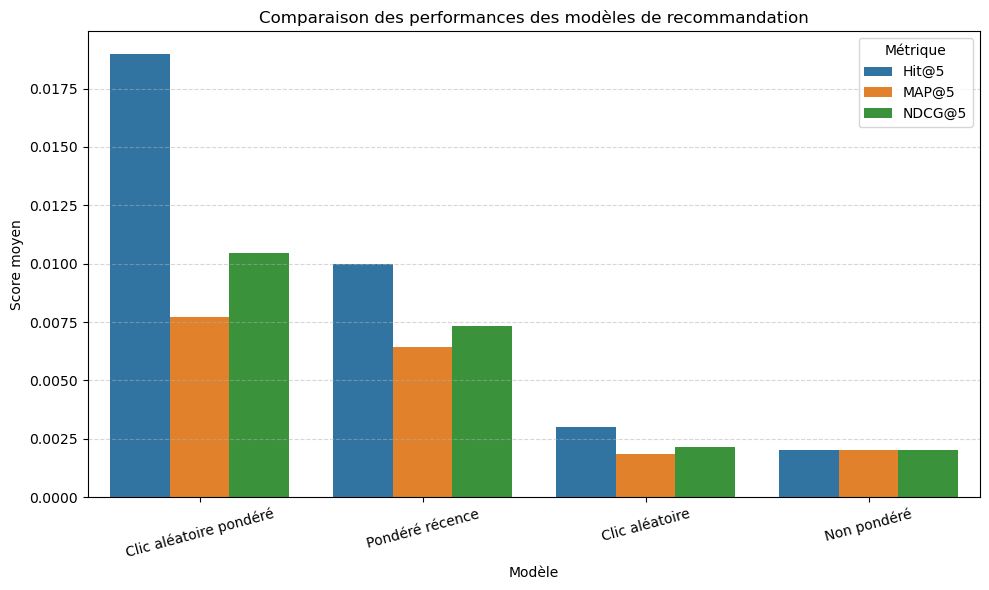

In [87]:
plot_recommendation_results(results_df)


## Embeddings restreint aux articles disponibles pendant la période d'observation

✅ Changement de contexte <br>

On conserve dans embeddings_df tous les articles publiés avant la fin de la période d’observation

Peu importe qu’ils aient été cliqués ou non,

Il faut simplement que leur created_at_ts ≤ max(session_start) <b>+ 86400 (un jour)</b>

In [92]:
# 1. Définir la limite temporelle : 1 jour après la dernière session observée
one_day_seconds = 86400
limite_ts = df["session_start"].max() + one_day_seconds

# 2. Sélectionner les article_id dont la date de publication est antérieure à cette limite
articles_disponibles = df_articles[df_articles["created_at_ts"] <= limite_ts]["article_id"].values

# 3. Filtrer embeddings_df sur ces articles
embeddings_df_restreint = embeddings_df.loc[embeddings_df.index.intersection(articles_disponibles)]

# 4. Mettre à jour les objets associés
article_ids = embeddings_df_restreint.index.to_numpy()
article_embeddings = embeddings_df_restreint.to_numpy()
embedding_dict = dict(zip(article_ids, article_embeddings))

# 5. (optionnel) Afficher le nombre d’articles conservés
print(f"{len(article_ids)} articles conservés sur {len(embeddings_df)} après filtrage temporel.")


257217 articles conservés sur 364047 après filtrage temporel.


In [93]:
results_df_time_limited, hit_userstime_limited = evaluate_prediction_functions(
    user_clicks_df=user_clicks_df,
    df=df,
    embedding_dict=embedding_dict,             # <-- mis à jour
    article_ids=article_ids,                   # <-- mis à jour
    article_embeddings=article_embeddings,     # <-- mis à jour
    predict_functions=predict_functions,
    k=5,
    n_users=1000  # ou un nombre pour échantillonner
)

Évaluation des modèles:   5%|▌         | 53/1000 [00:44<14:27,  1.09it/s]

✅ HIT trouvé pour user 26590 avec le modèle 'Clic aléatoire pondéré' (target: 72334)


Évaluation des modèles:  10%|█         | 105/1000 [01:29<12:39,  1.18it/s]

✅ HIT trouvé pour user 87373 avec le modèle 'Non pondéré' (target: 160974)
✅ HIT trouvé pour user 87373 avec le modèle 'Pondéré récence' (target: 160974)


Évaluation des modèles:  14%|█▎        | 137/1000 [01:55<12:05,  1.19it/s]

✅ HIT trouvé pour user 149520 avec le modèle 'Clic aléatoire pondéré' (target: 161602)


Évaluation des modèles:  15%|█▌        | 154/1000 [02:10<11:50,  1.19it/s]

✅ HIT trouvé pour user 227294 avec le modèle 'Pondéré récence' (target: 128551)


Évaluation des modèles:  16%|█▌        | 157/1000 [02:12<11:44,  1.20it/s]

✅ HIT trouvé pour user 46708 avec le modèle 'Clic aléatoire pondéré' (target: 50715)


Évaluation des modèles:  16%|█▌        | 161/1000 [02:16<11:47,  1.19it/s]

✅ HIT trouvé pour user 283101 avec le modèle 'Pondéré récence' (target: 353673)


Évaluation des modèles:  20%|██        | 202/1000 [02:50<11:11,  1.19it/s]

✅ HIT trouvé pour user 119442 avec le modèle 'Clic aléatoire' (target: 160132)


Évaluation des modèles:  20%|██        | 203/1000 [02:51<11:19,  1.17it/s]

✅ HIT trouvé pour user 119442 avec le modèle 'Clic aléatoire pondéré' (target: 160132)


Évaluation des modèles:  25%|██▍       | 247/1000 [03:29<10:48,  1.16it/s]

✅ HIT trouvé pour user 322362 avec le modèle 'Pondéré récence' (target: 111663)


Évaluation des modèles:  25%|██▍       | 248/1000 [03:29<10:41,  1.17it/s]

✅ HIT trouvé pour user 322362 avec le modèle 'Clic aléatoire pondéré' (target: 111738)


Évaluation des modèles:  25%|██▌       | 252/1000 [03:33<10:32,  1.18it/s]

✅ HIT trouvé pour user 290575 avec le modèle 'Pondéré récence' (target: 333150)


Évaluation des modèles:  25%|██▌       | 253/1000 [03:34<10:30,  1.18it/s]

✅ HIT trouvé pour user 290575 avec le modèle 'Clic aléatoire pondéré' (target: 336245)


Évaluation des modèles:  39%|███▉      | 389/1000 [05:31<09:02,  1.13it/s]

✅ HIT trouvé pour user 150176 avec le modèle 'Clic aléatoire pondéré' (target: 207994)


Évaluation des modèles:  43%|████▎     | 432/1000 [06:08<08:21,  1.13it/s]

✅ HIT trouvé pour user 92446 avec le modèle 'Non pondéré' (target: 160974)
✅ HIT trouvé pour user 92446 avec le modèle 'Pondéré récence' (target: 160974)
✅ HIT trouvé pour user 92446 avec le modèle 'Clic aléatoire' (target: 160974)


Évaluation des modèles:  43%|████▎     | 433/1000 [06:09<08:20,  1.13it/s]

✅ HIT trouvé pour user 92446 avec le modèle 'Clic aléatoire pondéré' (target: 160974)


Évaluation des modèles:  72%|███████▏  | 721/1000 [10:20<04:00,  1.16it/s]

✅ HIT trouvé pour user 243097 avec le modèle 'Non pondéré' (target: 123290)
✅ HIT trouvé pour user 243097 avec le modèle 'Pondéré récence' (target: 123290)
✅ HIT trouvé pour user 243097 avec le modèle 'Clic aléatoire' (target: 124350)


Évaluation des modèles:  72%|███████▏  | 722/1000 [10:20<03:59,  1.16it/s]

✅ HIT trouvé pour user 243097 avec le modèle 'Clic aléatoire pondéré' (target: 124350)


Évaluation des modèles:  74%|███████▍  | 738/1000 [10:34<03:46,  1.16it/s]

✅ HIT trouvé pour user 27505 avec le modèle 'Clic aléatoire' (target: 124352)


Évaluation des modèles:  74%|███████▍  | 739/1000 [10:35<03:45,  1.16it/s]

✅ HIT trouvé pour user 27505 avec le modèle 'Clic aléatoire pondéré' (target: 124352)


Évaluation des modèles:  75%|███████▍  | 749/1000 [10:44<03:43,  1.12it/s]

✅ HIT trouvé pour user 301618 avec le modèle 'Clic aléatoire pondéré' (target: 60009)


Évaluation des modèles:  77%|███████▋  | 768/1000 [11:01<03:19,  1.17it/s]

✅ HIT trouvé pour user 69606 avec le modèle 'Pondéré récence' (target: 50917)


Évaluation des modèles:  77%|███████▋  | 769/1000 [11:02<03:19,  1.16it/s]

✅ HIT trouvé pour user 69606 avec le modèle 'Clic aléatoire pondéré' (target: 50918)


Évaluation des modèles:  78%|███████▊  | 778/1000 [11:09<03:16,  1.13it/s]

✅ HIT trouvé pour user 65344 avec le modèle 'Clic aléatoire pondéré' (target: 32467)


Évaluation des modèles:  85%|████████▍ | 849/1000 [12:11<02:08,  1.17it/s]

✅ HIT trouvé pour user 172616 avec le modèle 'Clic aléatoire' (target: 160974)


Évaluation des modèles:  85%|████████▌ | 850/1000 [12:12<02:07,  1.18it/s]

✅ HIT trouvé pour user 172616 avec le modèle 'Clic aléatoire pondéré' (target: 160974)


Évaluation des modèles:  86%|████████▋ | 864/1000 [12:24<01:59,  1.13it/s]

✅ HIT trouvé pour user 24155 avec le modèle 'Clic aléatoire pondéré' (target: 123757)


Évaluation des modèles:  88%|████████▊ | 879/1000 [12:37<01:43,  1.16it/s]

✅ HIT trouvé pour user 85152 avec le modèle 'Non pondéré' (target: 160974)
✅ HIT trouvé pour user 85152 avec le modèle 'Pondéré récence' (target: 160974)


Évaluation des modèles:  88%|████████▊ | 882/1000 [12:40<01:42,  1.15it/s]

✅ HIT trouvé pour user 292624 avec le modèle 'Clic aléatoire pondéré' (target: 208150)


Évaluation des modèles:  91%|█████████ | 911/1000 [13:05<01:22,  1.08it/s]

✅ HIT trouvé pour user 47702 avec le modèle 'Pondéré récence' (target: 57616)


Évaluation des modèles:  94%|█████████▍| 942/1000 [13:32<00:49,  1.16it/s]

✅ HIT trouvé pour user 98990 avec le modèle 'Clic aléatoire' (target: 160974)


Évaluation des modèles:  94%|█████████▍| 943/1000 [13:33<00:50,  1.13it/s]

✅ HIT trouvé pour user 98990 avec le modèle 'Clic aléatoire pondéré' (target: 160974)


Évaluation des modèles:  95%|█████████▍| 948/1000 [13:37<00:44,  1.16it/s]

✅ HIT trouvé pour user 226576 avec le modèle 'Pondéré récence' (target: 209348)


Évaluation des modèles:  98%|█████████▊| 976/1000 [14:02<00:20,  1.16it/s]

✅ HIT trouvé pour user 87221 avec le modèle 'Clic aléatoire' (target: 160974)


Évaluation des modèles:  98%|█████████▊| 977/1000 [14:03<00:20,  1.14it/s]

✅ HIT trouvé pour user 87221 avec le modèle 'Clic aléatoire pondéré' (target: 160974)


Évaluation des modèles:  99%|█████████▉| 992/1000 [14:16<00:06,  1.15it/s]

✅ HIT trouvé pour user 29425 avec le modèle 'Non pondéré' (target: 160974)
✅ HIT trouvé pour user 29425 avec le modèle 'Pondéré récence' (target: 160974)


Évaluation des modèles: 100%|█████████▉| 999/1000 [14:22<00:00,  1.16it/s]

✅ HIT trouvé pour user 278204 avec le modèle 'Clic aléatoire pondéré' (target: 50289)


Évaluation des modèles: 100%|██████████| 1000/1000 [14:23<00:00,  1.16it/s]


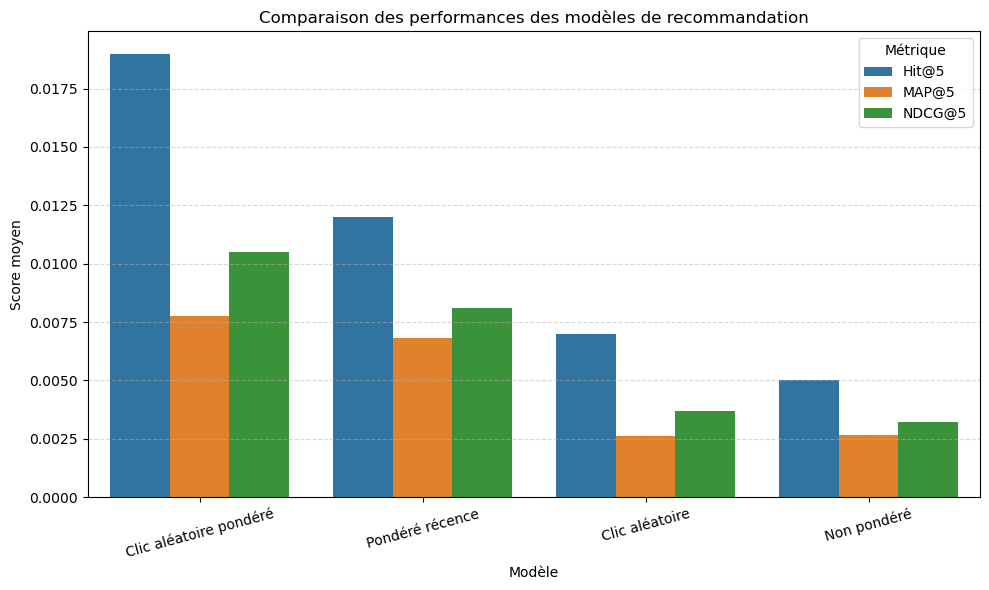

In [96]:
plot_recommendation_results(results_df_time_limited)


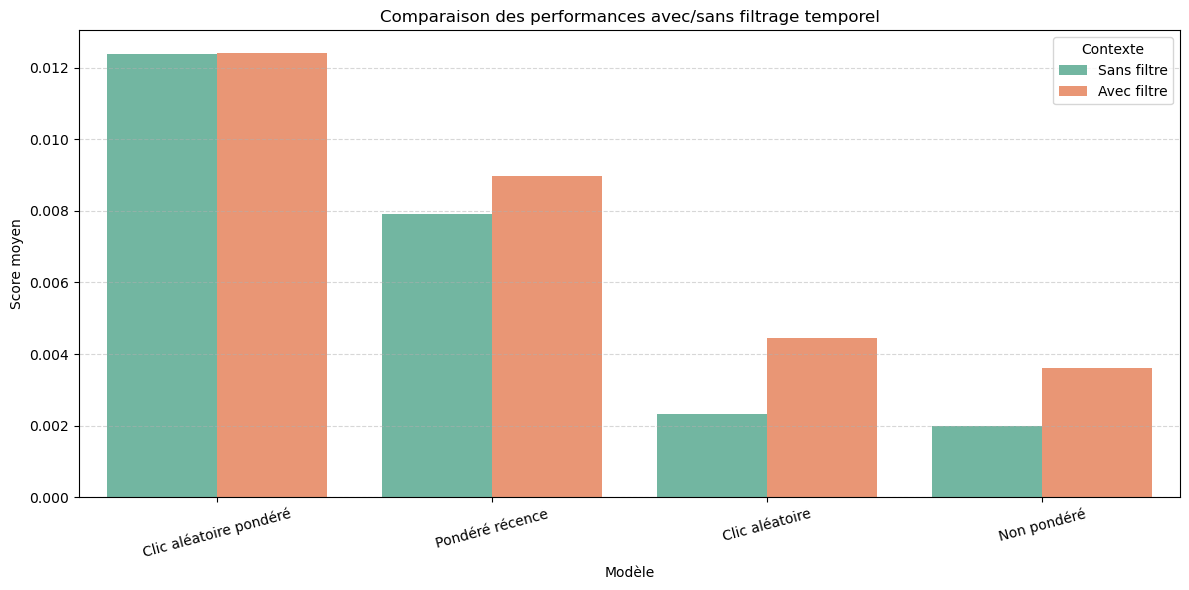

In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_comparative_results(results_df_full, results_df_limited, suffixes=("Sans filtre", "Avec filtre")):
    """
    Affiche un graphique comparant les performances de chaque modèle avec ou sans filtrage temporel.
    """
    # Ajouter un identifiant de contexte
    df_full = results_df_full.copy()
    df_full["Contexte"] = suffixes[0]

    df_limited = results_df_limited.copy()
    df_limited["Contexte"] = suffixes[1]

    # Fusionner les deux DataFrames
    df_all = pd.concat([df_full, df_limited], axis=0)

    # Convertir au format long
    df_long = df_all.melt(id_vars=["modèle", "Contexte"], var_name="Métrique", value_name="Score")

    # Tracer
    plt.figure(figsize=(12, 6))
    sns.barplot(data=df_long, x="modèle", y="Score", hue="Contexte", palette="Set2", errorbar=None)
    plt.title("Comparaison des performances avec/sans filtrage temporel")
    plt.ylabel("Score moyen")
    plt.xlabel("Modèle")
    plt.xticks(rotation=15)
    plt.legend(title="Contexte")
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# Appel
plot_comparative_results(results_df, results_df_time_limited)
